# Using bootstrap for finding Confidence Intervals
# Example - linear model

In [1]:
import numpy as np
import pandas as pd
    
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [2]:
# set a seed 
np.random.seed(2)

# create a dataset 
# we choose some random int values between 5 t0 40
X = np.random.randn(200)

# let us also create a stimulated y
y = -2 + 1.2*X + 3.1*X**3 +  20*np.random.randn(200)

Text(0.5, 1.0, 'Distribution of data')

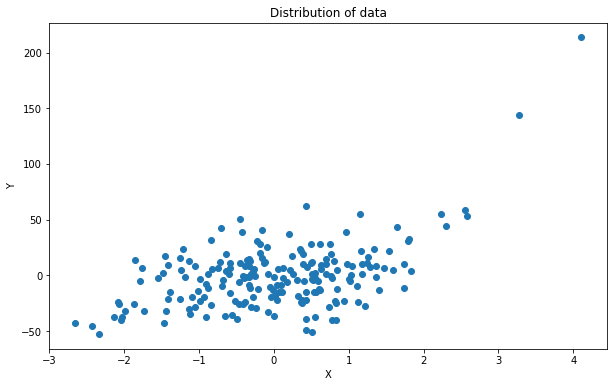

In [3]:
# lets see how it looks 
plt.figure(figsize = (10,6))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribution of data')

In [4]:
# finding the lin reg line
lin_reg = LinearRegression()
lin_reg.fit(pd.DataFrame(X),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Linear Regression')

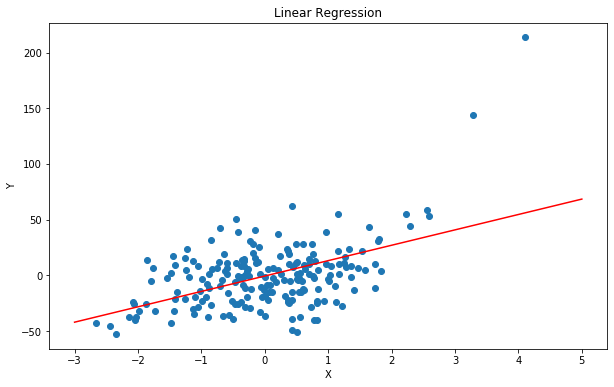

In [5]:
X_test = np.linspace(-3,5,200)
pred = lin_reg.predict(pd.DataFrame(X_test))

# plotting the reg line
plt.figure(figsize = (10,6))
plt.scatter(X,y)
plt.plot(X_test,pred,color = 'red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')

In [6]:
# finding confidence intervals using boostrap

In [7]:
data = pd.DataFrame({'X':X,'Y':y})
data.head()

,X,Y
0,-0.416758,-25.744563
1,-0.056267,-10.598522
2,-2.136196,-37.745724
3,1.640271,43.677765
4,-1.793436,-4.642280


In [8]:
from bootstrap import Bootstrap_ci

In [9]:
bootstrap = Bootstrap_ci()

In [10]:
li,ui = bootstrap.boot(data['X'],data['Y'],1000,X_test,LinearRegression())

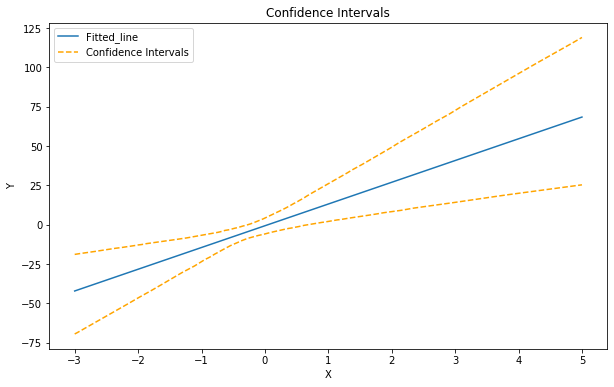

In [15]:
plt.figure(figsize = (10,6))
plt.plot(X_test,lin_reg.predict(pd.DataFrame(X_test)),label = 'Fitted_line')
plt.plot(X_test,ui,linestyle = 'dashed',color = 'orange',label = 'Confidence Intervals')
plt.plot(X_test,li,linestyle = 'dashed',color = 'orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Confidence Intervals')
plt.legend()